## BAX 452 001-002 WQ 2024 Machine Learning
## Final Project
## Group 5
## Richard Liu, Shivank Chandra

In [65]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import kstest
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression, LassoCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import xgboost as xgb




In [66]:
directory_path = '/Users/richardaliu/Downloads/Winter/BAX 452/Final Project'
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/richardaliu/Downloads/Winter/BAX 452/Final Project


1. Data Exploration and Visualization

In [67]:
car = 'car_rental_data.csv'
df = pd.read_csv(car)
df.dropna(inplace=True)
df.describe()

,Unnamed: 0,Seats,Storage
count,343.000000,343.000000,343.000000
mean,171.000000,5.163265,2.562682
std,99.159804,1.183287,0.757810
min,0.000000,4.000000,1.000000
25%,85.500000,5.000000,2.000000
50%,171.000000,5.000000,3.000000
75%,256.500000,5.000000,3.000000
max,342.000000,15.000000,4.000000


In [68]:
df.head()

,Unnamed: 0,Car_Name,Supplier,Tier,Seats,Storage,Pickup,Price
0,0,Ford Focus,Thrifty,Compact,5,2.0,San Francisco International Airport,84.96
1,1,Ford Fusion,Thrifty,Full-Size,5,3.0,San Francisco International Airport,101.12
2,2,Ford Escape,Thrifty,Intermediate,5,3.0,San Francisco International Airport,101.50
3,3,Toyota Yaris,Fox,Economy,4,1.0,Metropolitan Oakland International Airport,57
4,4,Toyota Yaris,Fox Rent A Car,Economy,4,1.0,Metropolitan Oakland International Airport,71


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  343 non-null    int64  
 1   Car_Name    343 non-null    object 
 2   Supplier    343 non-null    object 
 3   Tier        343 non-null    object 
 4   Seats       343 non-null    int64  
 5   Storage     343 non-null    float64
 6   Pickup      343 non-null    object 
 7   Price       343 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 24.1+ KB


In [70]:
null_count = df.isnull().sum()
print(null_count)

Unnamed: 0    0
Car_Name      0
Supplier      0
Tier          0
Seats         0
Storage       0
Pickup        0
Price         0
dtype: int64


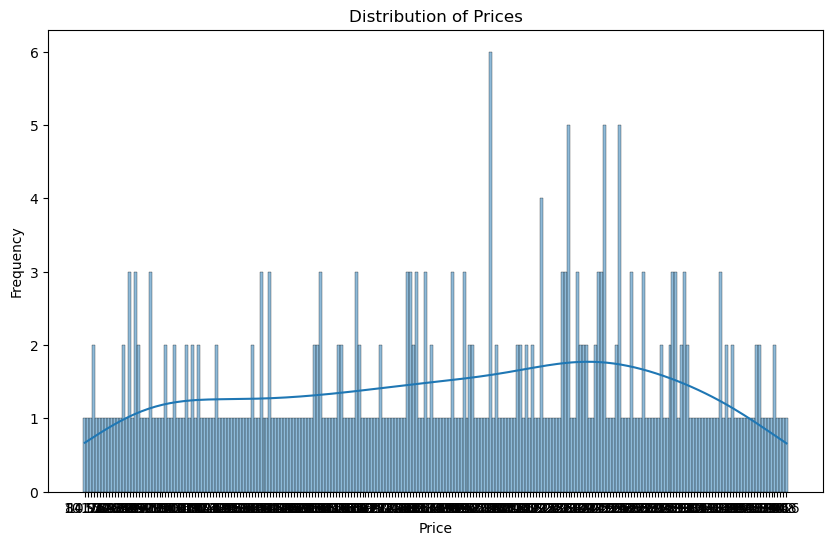

In [71]:
# 1. Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

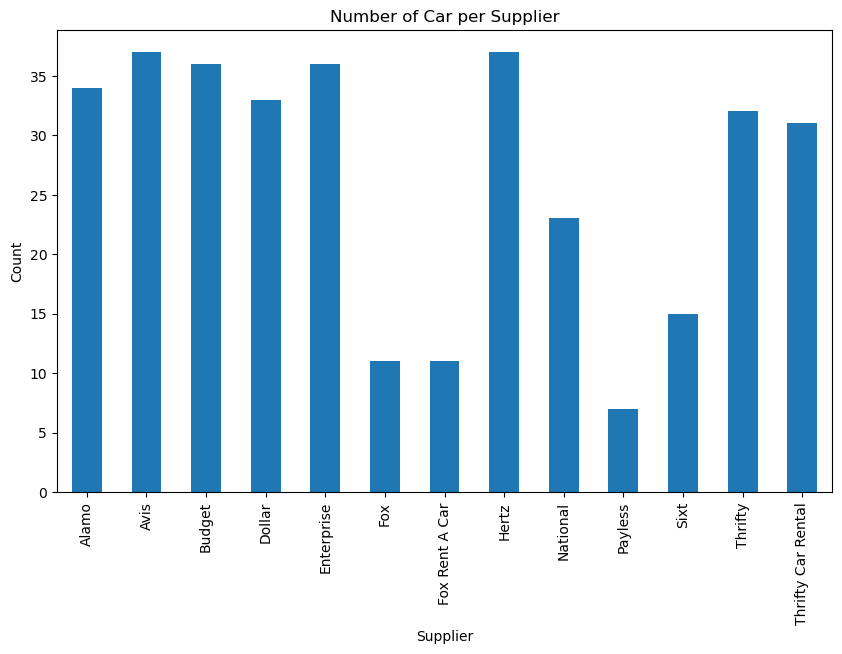

In [72]:
# Bar Graph
df['Supplier'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Car per Supplier')
plt.xlabel('Supplier')
plt.ylabel('Count')
plt.show()

Linear Regression

In [73]:
#Set Pickup area into numeric value
df['Pickup'] = df['Pickup'].map({
    'San Francisco International Airport': 1,
    'Metropolitan Oakland International Airport': 2,
    'San Francisco - Yerba Buena': 3
})

In [74]:
#Organize Supplier name
df['Supplier'] = df['Supplier'].replace({'Fox Rent A Car': 'Fox'})

df['Supplier'] = df['Supplier'].replace({'Thrifty Car Rental': 'Thrifty'})

In [75]:
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[['Supplier', 'Tier']])

/Users/richardaliu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Supplier', 'Tier']))

In [77]:
df_combined = pd.concat([df, encoded_df], axis=1)

In [78]:
df_combined = df_combined.drop(['Car_Name', 'Tier', 'Supplier'], axis=1)

In [79]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 342
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           343 non-null    int64  
 1   Seats                343 non-null    int64  
 2   Storage              343 non-null    float64
 3   Pickup               343 non-null    int64  
 4   Price                343 non-null    object 
 5   Supplier_Alamo       343 non-null    float64
 6   Supplier_Avis        343 non-null    float64
 7   Supplier_Budget      343 non-null    float64
 8   Supplier_Dollar      343 non-null    float64
 9   Supplier_Enterprise  343 non-null    float64
 10  Supplier_Fox         343 non-null    float64
 11  Supplier_Hertz       343 non-null    float64
 12  Supplier_National    343 non-null    float64
 13  Supplier_Payless     343 non-null    float64
 14  Supplier_Sixt        343 non-null    float64
 15  Supplier_Thrifty     343 non-null    float64


In [80]:
df_combined['Price'] = pd.to_numeric(df_combined['Price'], errors='coerce')

In [81]:
df_combined = df_combined.drop(columns=[df_combined.columns[0]])

In [82]:
df_new = df_combined.drop(['Price'], axis=1)

In [83]:
df_new.head()

,Seats,Storage,Pickup,Supplier_Alamo,Supplier_Avis,Supplier_Budget,Supplier_Dollar,Supplier_Enterprise,Supplier_Fox,Supplier_Hertz,...,Supplier_Thrifty,Tier_Compact,Tier_Economy,Tier_Full-Size,Tier_Intermediate,Tier_Luxury,Tier_Minivan,Tier_Premium,Tier_Special,Tier_Standard
0,5,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 342
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Seats                343 non-null    int64  
 1   Storage              343 non-null    float64
 2   Pickup               343 non-null    int64  
 3   Supplier_Alamo       343 non-null    float64
 4   Supplier_Avis        343 non-null    float64
 5   Supplier_Budget      343 non-null    float64
 6   Supplier_Dollar      343 non-null    float64
 7   Supplier_Enterprise  343 non-null    float64
 8   Supplier_Fox         343 non-null    float64
 9   Supplier_Hertz       343 non-null    float64
 10  Supplier_National    343 non-null    float64
 11  Supplier_Payless     343 non-null    float64
 12  Supplier_Sixt        343 non-null    float64
 13  Supplier_Thrifty     343 non-null    float64
 14  Tier_Compact         343 non-null    float64
 15  Tier_Economy         343 non-null    float64


In [85]:
# Add a constant term to the independent variable
X = df_new

# Define the dependent variable
y = df_combined['Price']

model = smf.ols(formula='y ~ X',data=df_combined).fit()
# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     28.42
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.11e-60
Time:                        23:06:42   Log-Likelihood:                -1803.5
No. Observations:                 343   AIC:                             3651.
Df Residuals:                     321   BIC:                             3735.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.3356     15.624      3.478      0.0

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2813.6541158986365


In [87]:
print(f'Coefficients: {linear_model.coef_}')
print(f'Intercept: {linear_model.intercept_}')

Coefficients: [ 19.98423888  19.05186944 -10.60709174 -16.58955287  58.71174403
  45.6300455  -34.04574286  18.78645663 -72.5075837  -16.65936374
  47.5673344  -52.75345187  59.70030248 -37.840188   -29.95803729
 -29.94641044  -7.17575285 -26.10492785  35.197513    29.43574317
  31.73154832  -1.48116806  -1.69850801]
Intercept: 73.25368037721648


In [88]:
y_pred = linear_model.predict(X_test)

In [89]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Root Mean Squared Error: 53.043888581990636
OOS R-squared (R2) Score: 0.5345317658649789


Lasso regularization

In [90]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Assuming X_train and y_train are your features and target variable
lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

print(lasso_cv.alpha_)


0.26588062322160444


In [92]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.26)

# Fit Lasso model to the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [93]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Root Mean Squared Error: 52.79219510300894
OOS R-squared (R2) Score: 0.5389385833545384


Random Forest

In [94]:
rf_model = RandomForestRegressor(n_estimators=500, oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

In [95]:
# Evaluate the model
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)
rmse = np.sqrt(mse)

print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Root Mean Squared Error: 44.94636504767898
OOS R-squared (R2) Score: 0.6821102669882699


In [96]:
xg_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

xg_model.fit(X_train, y_train)

xg_pred = xg_reg.predict(X_test)


In [97]:
# Evaluate the model
mse = mean_squared_error(y_test, xg_pred)
r2 = r2_score(y_test, xg_pred)
rmse = np.sqrt(mse)

print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Root Mean Squared Error: 64.87055641457668
OOS R-squared (R2) Score: 0.33781003028184653
